## Project: Zillow's market value estimation

**Introduction:**\
A Zestimate is Zillow’s estimated market value for a home, computed using a proprietary formula including public and user-submitted data, such as details about a home (bedrooms, bathrooms, home age, etc.), location, property tax assessment information and sales histories of the subject home as well as other homes that have recently sold in the area.

**Objective:**\
In this competition, Zillow is asking you to predict the log-error between their Zestimate and the actual sale price, given all the features of a home. The log error is defined as\
$logerror=log(Zestimate)−log(SalePrice)$\
and it is recorded in the transactions file train.csv. In this competition, you are going to predict the logerror for the months in Fall 2017.\[1pt]

### Import of python libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.decomposition import PCA

### Import of the data

In [2]:
# zillow_dict explains the fields of the available data
zillow_dict = pd.read_excel('zillow_data_dictionary.xlsx')
zillow_dict

,Feature,Description
0,'airconditioningtypeid',Type of cooling system present in the home (i...
1,'architecturalstyletypeid',"Architectural style of the home (i.e. ranch, ..."
2,'basementsqft',Finished living area below or partially below...
3,'bathroomcnt',Number of bathrooms in home including fractio...
4,'bedroomcnt',Number of bedrooms in home
5,'buildingqualitytypeid',Overall assessment of condition of the buildi...
6,'buildingclasstypeid',"The building framing type (steel frame, wood f..."
7,'calculatedbathnbr',Number of bathrooms in home including fractio...
8,'decktypeid',Type of deck (if any) present on parcel
9,'threequarterbathnbr',Number of 3/4 bathrooms in house (shower + si...


In [3]:
# Import the file into our working environment
df_2016 = pd.read_csv('properties_2016.csv')

C:\Users\lucap\AppData\Local\Temp\ipykernel_33244\1698785960.py:2: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2016 = pd.read_csv('properties_2016.csv')


In [36]:
# Import the file into our working environment
df_2017 = pd.read_csv('properties_2017.csv')

C:\Users\lucap\AppData\Local\Temp\ipykernel_33244\538095367.py:2: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2017 = pd.read_csv('properties_2017.csv')


In [37]:
print('DataFrame df_2016 has shape = ', df_2016.shape)
print('DataFrame df_2017 has shape = ', df_2017.shape)

DataFrame df_2016 has shape =  (2985217, 58)
DataFrame df_2017 has shape =  (2985217, 58)


In [38]:
df_2017.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,...,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


In [39]:
#Check if there are new parcelid in the two dataframe: df_2016 and df_2017
union = pd.Series(np.union1d(df_2016.parcelid, df_2017.parcelid)) 
intersect = pd.Series(np.intersect1d(df_2016.parcelid, df_2017.parcelid))  
notcommonseries = union[~union.isin(intersect)] 
print('We found {} common parcelid in the two DataFrames '.format(len(notcommonseries)))

We found 0 common parcelid in the two DataFrames 


In [40]:
print('We found {} unique parcelid in the DataFrame df_2017 '.format(len(df_2017.parcelid.unique())))

We found 2985217 unique parcelid in the DataFrame df_2017 


In [41]:
df = df_2017

In [42]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   parcelid                      2985217 non-null  int64  
 1   airconditioningtypeid         815362 non-null   float64
 2   architecturalstyletypeid      6061 non-null     float64
 3   basementsqft                  1627 non-null     float64
 4   bathroomcnt                   2982260 non-null  float64
 5   bedroomcnt                    2982272 non-null  float64
 6   buildingclasstypeid           12731 non-null    float64
 7   buildingqualitytypeid         1941395 non-null  float64
 8   calculatedbathnbr             2868061 non-null  float64
 9   decktypeid                    17379 non-null    float64
 10  finishedfloor1squarefeet      203758 non-null   float64
 11  calculatedfinishedsquarefeet  2940120 non-null  float64
 12  finishedsquarefeet12        

In [43]:
df.describe()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,2.985217e+06,815362.000000,6061.000000,1627.000000,2.982260e+06,2.982272e+06,12731.000000,1.941395e+06,2.868061e+06,17379.0,...,2646.000000,2.937384e+06,685676.000000,2.938753e+06,2.950951e+06,2.982284e+06,2.925291e+06,2.962465e+06,56517.000000,2.910232e+06
mean,1.332586e+07,1.945723,7.202607,647.220652,2.216196e+00,3.093362e+00,3.734742,6.280822e+00,2.303826e+00,66.0,...,278.365457,1.964438e+03,1.400956,1.781429e+05,4.435279e+05,2.015998e+03,2.684558e+05,5.408949e+03,13.891696,6.048434e+13
std,7.909966e+06,3.160507,2.436290,538.787104,1.078250e+00,1.271569e+00,0.500371,1.729923e+00,1.003243e+00,0.0,...,369.784399,2.364428e+01,0.539056,4.600503e+05,8.163366e+05,6.039949e-02,4.865097e+05,9.675567e+03,2.562172,3.249133e+11
min,1.071172e+07,1.000000,2.000000,20.000000,0.000000e+00,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,66.0,...,10.000000,1.801000e+03,1.000000,1.000000e+00,1.000000e+00,2.000000e+03,1.000000e+00,2.400000e-01,0.000000,-1.000000e+00
25%,1.164371e+07,1.000000,7.000000,272.000000,2.000000e+00,2.000000e+00,3.000000,5.000000e+00,2.000000e+00,66.0,...,96.000000,1.950000e+03,1.000000,7.766600e+04,1.882200e+05,2.016000e+03,7.970000e+04,2.468620e+03,14.000000,6.037400e+13
50%,1.254509e+07,1.000000,7.000000,535.000000,2.000000e+00,3.000000e+00,4.000000,6.000000e+00,2.000000e+00,66.0,...,168.000000,1.963000e+03,1.000000,1.270660e+05,3.211610e+05,2.016000e+03,1.766190e+05,4.007620e+03,14.000000,6.037572e+13
75%,1.409712e+07,1.000000,7.000000,847.500000,3.000000e+00,4.000000e+00,4.000000,8.000000e+00,3.000000e+00,66.0,...,320.000000,1.981000e+03,2.000000,2.040000e+05,5.140720e+05,2.016000e+03,3.261000e+05,6.230500e+03,15.000000,6.059042e+13
max,1.696019e+08,13.000000,27.000000,8516.000000,3.200000e+01,2.500000e+01,5.000000,1.200000e+01,3.200000e+01,66.0,...,6141.000000,2.016000e+03,41.000000,2.553212e+08,3.196225e+08,2.016000e+03,9.401108e+07,3.823176e+06,99.000000,4.830301e+14


In [44]:
print('DataFrame has shape = ', df.shape)
print('There are {:.0f} numeric columns'.format(df.select_dtypes(include=np.number).shape[1]))
num_cols = df.select_dtypes(include=np.number).columns
print('----------------')
print('And {:.0f} not numeric columns'.format(df.select_dtypes(exclude=np.number).shape[1]))
cat_cols = df.select_dtypes(exclude=np.number).columns
df.select_dtypes(include='number')
print('****************')

DataFrame has shape =  (2985217, 58)
There are 53 numeric columns
----------------
And 5 not numeric columns
****************


In [45]:
# We focus our analysis in predicting the record 'taxvaluedollarcnt': The total tax assessed value of the parcel
# For this reason we drop the other tax-related columns
col2drop = ['structuretaxvaluedollarcnt',
            'landtaxvaluedollarcnt',
            'taxamount',
            'taxdelinquencyflag',
            'taxdelinquencyyear']
df.drop(col2drop, axis=1, inplace = True)

In [46]:
# drop columns which has less than 60% of the entries
df_clean = df.dropna(thresh=df.shape[0]*0.6,axis=1)

In [47]:
df_clean.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 26 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   parcelid                      2985217 non-null  int64  
 1   bathroomcnt                   2982260 non-null  float64
 2   bedroomcnt                    2982272 non-null  float64
 3   buildingqualitytypeid         1941395 non-null  float64
 4   calculatedbathnbr             2868061 non-null  float64
 5   calculatedfinishedsquarefeet  2940120 non-null  float64
 6   finishedsquarefeet12          2720786 non-null  float64
 7   fips                          2982285 non-null  float64
 8   fullbathcnt                   2868061 non-null  float64
 9   heatingorsystemtypeid         1869164 non-null  float64
 10  latitude                      2982285 non-null  float64
 11  longitude                     2982285 non-null  float64
 12  lotsizesquarefeet           

In [48]:
col2include = ['yearbuilt',
                'regionidcity',
                'regionidcounty',
                'regionidzip',
                'roomcnt',
                'bathroomcnt',
                'bedroomcnt',
                'calculatedfinishedsquarefeet',
                'assessmentyear',
                'taxvaluedollarcnt']
df_filter = df_clean[col2include]

In [49]:
# drop records without taxvaluedollarcnt
df_filter = df_filter[df_filter['taxvaluedollarcnt'].notna()]

In [50]:
# fill nan with the median value
df_filter = df_filter.fillna(df_filter.median()) 

In [51]:
df_filter.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2950951 entries, 0 to 2982283
Data columns (total 10 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   yearbuilt                     2950951 non-null  float64
 1   regionidcity                  2950951 non-null  float64
 2   regionidcounty                2950951 non-null  float64
 3   regionidzip                   2950951 non-null  float64
 4   roomcnt                       2950951 non-null  float64
 5   bathroomcnt                   2950951 non-null  float64
 6   bedroomcnt                    2950951 non-null  float64
 7   calculatedfinishedsquarefeet  2950951 non-null  float64
 8   assessmentyear                2950951 non-null  float64
 9   taxvaluedollarcnt             2950951 non-null  float64
dtypes: float64(10)
memory usage: 247.7 MB


In [52]:
df_filter[df_filter.yearbuilt.isna()]

,yearbuilt,regionidcity,regionidcounty,regionidzip,roomcnt,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,assessmentyear,taxvaluedollarcnt


DataFrame has shape =  (2950951, 9)
There are 9 numeric columns and they are:
----------------
And 0 not numeric columns and they are:
****************


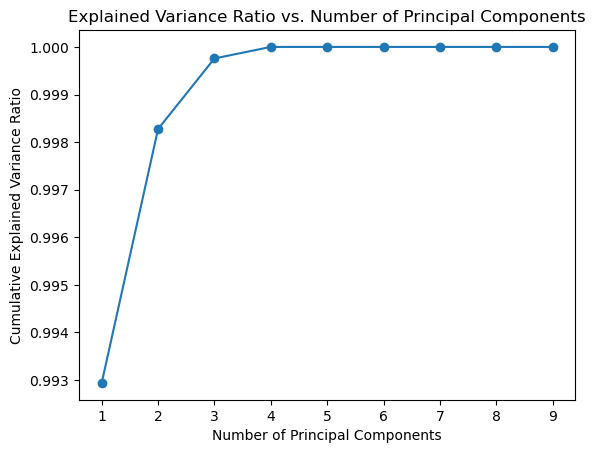

In [53]:
# PCA: investigate the variance contained in the actual df
pca = PCA()
#remove the target column 'taxvaluedollarcnt'
df_pca = df_filter.loc[:, df_filter.columns != 'taxvaluedollarcnt']

print('DataFrame has shape = ', df_pca.shape)
print('There are {:.0f} numeric columns and they are:'.format(df_pca.select_dtypes(include=np.number).shape[1]))
num_cols = df_pca.select_dtypes(include=np.number).columns
print('----------------')
print('And {:.0f} not numeric columns and they are:'.format(df_pca.select_dtypes(exclude=np.number).shape[1]))
cat_cols = df_pca.select_dtypes(exclude=np.number).columns
df.select_dtypes(include='number')
print('****************')
#remove the not numerical columns
df_pca = df_pca[num_cols]
X_pca = pca.fit_transform(df_pca)

# Plot Explained Variance Ratio
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)

plt.figure()
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()

In [54]:
num_cols

Index(['yearbuilt', 'regionidcity', 'regionidcounty', 'regionidzip', 'roomcnt',
       'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',
       'assessmentyear'],
      dtype='object')

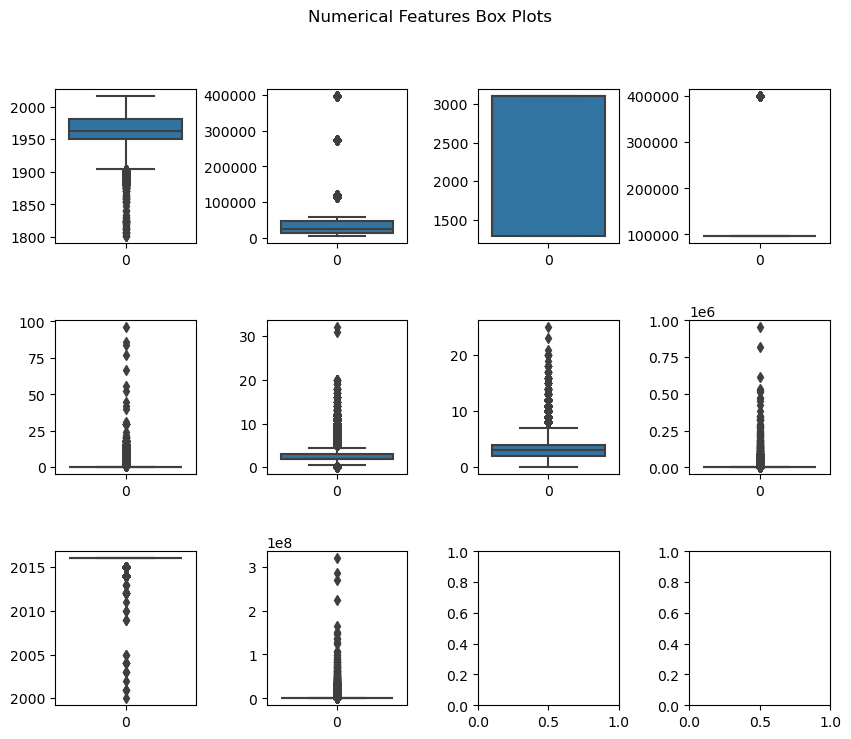

In [55]:
%matplotlib inline
cat_cols  = list(df_filter.select_dtypes(include='object').columns)
num_cols = list(df_filter.select_dtypes(include='number').columns)
# Create boxplots for all numerical columns
fig, axes = plt.subplots(3,4,figsize=(10,8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
axes = axes.flatten()
for i in range(len(num_cols)):
    sns.boxplot(df_filter[num_cols[i]], ax=axes[i])
fig.suptitle('Numerical Features Box Plots')
plt.show()

### Downsample the dataset

In [64]:
# Randomly sample 1% of your dataframe
df_percent = df_filter.sample(frac=0.05)
print('the original df had shape:  %s' % (df_filter.shape,))
print('and now the shape is: %s' % (df_percent.shape,))

the original df had shape:  (2950951, 2)
and now the shape is: (147548, 2)


In [65]:
df_label = df_percent['taxvaluedollarcnt']
df_data = df_percent.loc[:, df_percent.columns != 'taxvaluedollarcnt']
print(df_data.shape)

(147548, 1)


In [66]:
df_label[df_label.isna()]

Series([], Name: taxvaluedollarcnt, dtype: float64)

In [67]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_data, df_label, test_size=0.2, random_state=42)

In [68]:
import statistics
import xgboost as xgb

from sklearn.metrics         import mean_squared_error, \
                                    mean_absolute_error, \
                                    mean_squared_log_error, \
                                    r2_score
from sklearn.pipeline        import Pipeline
from sklearn.preprocessing   import StandardScaler, \
                                    OneHotEncoder
from sklearn.compose         import ColumnTransformer
from sklearn.impute          import SimpleImputer

from sklearn.svm             import SVR
from sklearn.tree            import DecisionTreeRegressor
from sklearn.linear_model    import LinearRegression, \
                                    BayesianRidge, \
                                    Ridge, \
                                    LassoCV
from sklearn.model_selection import KFold, \
                                    cross_val_score, \
                                    train_test_split
from sklearn.ensemble        import GradientBoostingRegressor, \
                                    RandomForestRegressor, \
                                    ExtraTreesRegressor, \
                                    AdaBoostRegressor, \
                                    BaggingRegressor, \
                                    StackingRegressor, \
                                    VotingRegressor
from sklearn.neighbors       import KNeighborsRegressor
from sklearn.neural_network  import MLPRegressor

In [69]:
categorical_cols = df_data.select_dtypes(include=['object']).columns
numerical_cols = df_data.select_dtypes(include=['int64', 'float64']).columns

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

In [70]:
models = {
    'LinearRegression':          LinearRegression(),
    'DecisionTreeRegressor':     DecisionTreeRegressor(),
    'KNeighborsRegressor':       KNeighborsRegressor(),
    'XGBRegressor':              xgb.XGBRegressor(
                                    colsample_bytree=0.4603, 
                                    gamma=0.0468, 
                                    learning_rate=0.05, 
                                    max_depth=3, 
                                    min_child_weight=1.7817, 
                                    n_estimators=100,
                                    reg_alpha=0.4640, 
                                    reg_lambda=0.8571,
                                    subsample=0.5213
                                 ),
    'GradientBoostingRegressor': GradientBoostingRegressor(
                                    n_estimators=100, 
                                    learning_rate=0.05,
                                    max_depth=4, 
                                    max_features='sqrt',
                                    min_samples_leaf=15, 
                                    min_samples_split=10, 
                                    loss='huber',
                                 ),
}

    # 'Support Vector Machine':    SVR(
    #                                 kernel='rbf', 
    #                                 C=1000000, 
    #                                 epsilon=0.001
    #                              ),

In [71]:
def evaluate_model(pipeline, X, y, kf):
    cv_mae = cross_val_score(pipeline, X, y, cv=kf, scoring='neg_mean_absolute_error')
    cv_mse = cross_val_score(pipeline, X, y, cv=kf, scoring='neg_mean_squared_error')
    cv_r2  = cross_val_score(pipeline, X, y, cv=kf, scoring='r2')
    
    mae = -statistics.mean(cv_mae)
    mse = -statistics.mean(cv_mse)
    rmse = np.sqrt(mse)
    r2 = statistics.mean(cv_r2)
    
    return mae, mse, rmse, r2

In [72]:
import time

results = {}

kf = KFold(n_splits=5, shuffle=True)

for name, model in models.items():

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    print(f'Model {name} begining now ...')
    begin_time = time.time()
    mae, mse, rmse, r2 = evaluate_model(pipeline, df_data, df_label, kf)
    end_time = time.time()
    print(f'Model {name} finishing in'.ljust(50), f'{round((end_time - begin_time) / 60, 1)} minutes')

    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R^2': r2
    }

Model LinearRegression begining now ...
Model LinearRegression finishing in                0.0 minutes
Model DecisionTreeRegressor begining now ...
Model DecisionTreeRegressor finishing in           0.1 minutes
Model KNeighborsRegressor begining now ...
Model KNeighborsRegressor finishing in             0.0 minutes
Model XGBRegressor begining now ...
Model XGBRegressor finishing in                    0.2 minutes
Model GradientBoostingRegressor begining now ...
Model GradientBoostingRegressor finishing in       2.9 minutes


In [73]:
df_results = pd.DataFrame(results).T
df_results

,MAE,MSE,RMSE,R^2
LinearRegression,286716.549199,6.140277e+11,783599.202808,0.000288
DecisionTreeRegressor,235756.581358,5.604097e+11,748605.147633,0.110664
KNeighborsRegressor,225944.263354,5.030930e+11,709290.473243,0.148445
XGBRegressor,265844.485621,5.680495e+11,753690.570740,0.090566
GradientBoostingRegressor,245213.350061,5.616137e+11,749408.906403,0.104303


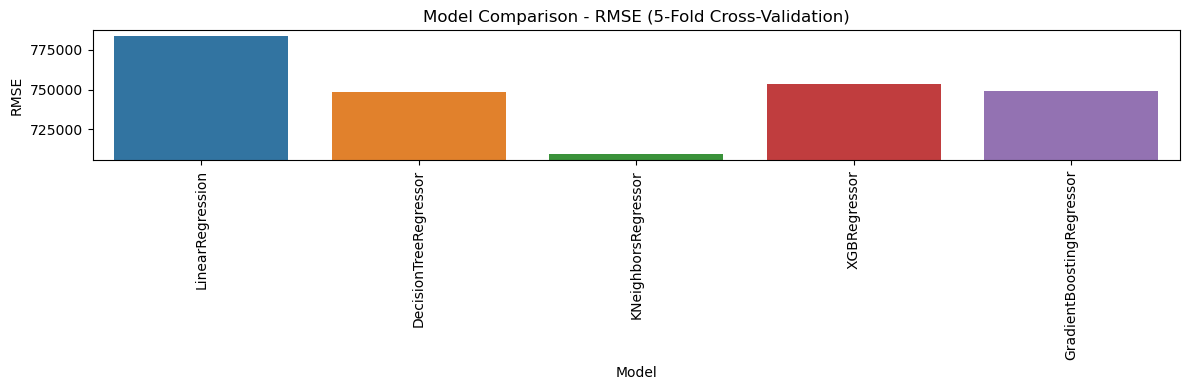

In [74]:
%matplotlib inline
df_results.reset_index(inplace=True)
rmse_df = df_results[['index', 'RMSE']]

plt.figure(figsize=(12, 4))
sns.barplot(data=rmse_df, x='index', y='RMSE')

plt.title("Model Comparison - RMSE (5-Fold Cross-Validation)")
plt.xlabel("Model")
plt.ylabel("RMSE")
yminlim = rmse_df['RMSE'].min()
ymaxlim = rmse_df['RMSE'].max()
yrange = (ymaxlim - yminlim) * .05
yminlim -= yrange
ymaxlim += yrange
plt.ylim(yminlim, ymaxlim)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [81]:
best_regressor_name = df_results.sort_values(by=['RMSE']).head(1)['index'].iloc[0]
best_regressor = models[best_regressor_name]

In [83]:
df_label = df_filter['taxvaluedollarcnt']
df_data = df_filter.loc[:, df_percent.columns != 'taxvaluedollarcnt']
print(df_data.shape)

(2950951, 9)


In [84]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_data, df_label, test_size=0.2, random_state=42)

In [85]:
scaler = StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)

X_test_sc = scaler.transform(X_test)

In [91]:
best_model = best_regressor.fit(X_train_sc, y_train)

In [94]:
pred = best_model.predict(X_test_sc)
np.sqrt(mean_squared_error(y_test, pred))

785490.4711579232

In [101]:
best_model.predict(X_test_sc[idx].reshape(1, -1))

array([261434.6])

In [105]:
idx = 3
print('The true value is: ' +str(y_test.iloc[idx]))
print('and the predicted value is: ' +str(best_model.predict(X_test_sc[idx].reshape(1, -1))))

The true value is: 427579.0
and the predicted value is: [607744.2]


In [145]:
from joblib import dump

# Save the best model to disk
model_filename = f'best_model_{best_regressor_name.replace(" ", "_").lower()}.joblib'
dump(best_model, model_filename)
print(f"Model saved as {model_filename}")

Model saved as best_model_kneighborsregressor.joblib
